### <p style="text-align: right;"> &#9989; Elizabeth Walter</p>

# Day 12 Pre-Class Assignment: Regression
<br/>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Linear_regression.svg/1200px-Linear_regression.svg.png" alt="Regression" width=500px/>


## Goals for today's pre-class assignment

* Learn a bit about regression
* Perform linear regression "by hand"
* Use NumPy's built-in `polyfit()` function to fit data

## Assignment instructions

**This assignment is due by 11:59 p.m. the day before class,** and should be uploaded into the appropriate "Pre-class assignments" submission folder.  If you run into issues with your code, make sure to use Slack to help each other out and receive some assistance from the instructors. Submission instructions can be found at the end of the notebook.

---
## Part 1: What is Regression?

In many applications, data depends on other data.  This is expressed with dependent variables that depend on independent variables.  For example, we know that sunlight ($s$, dependent variable) depends on the time of day ($t$, independent variable) and this can be expressed with saying $s$ is some function, $f$, of $t$ with $s = f(t)$.  If brigtness is linearly related to the time of day, we can fit a line through the relationship of these variables. 

One of the problems that arises in data science is that the data is invariably imperfect. We often say that the data has "noise" or "fluctuations". The problem is that we know that some of these fluctuations are not real: they are caused by errors in our measurements or any other factor that is not in our control. We do not want to take those fluctuations literally. In other cases the fluctuations might actually be real, but we don't want to focus our attention on those details because we simply want the trend. Regression solves this problem by providing a methodology to find a smoother function that is consistent with your data but doesn't attempt to match every detail, which may or may not be a real signal. 

A common form of regression is called **simple linear regression**. Simple linear regression finds the best line that goes through noisy data. But, there are other forms of regression that we will be interested in. Here are some of the methods we will explore in this class:

* Simple linear regression: fitting a best-fit line through a data set
* Polynomial linear regression: rather than assuming a line, which has the form $mx+b$, we might assume some other polynomial, such as $ax^2 + mx + b$.  
* Curve fitting: we might want to fit to some other curve, which you need to supply based on some insight into the data, of arbitrary form; for example, the exponential $ae^{-t}+ b$

For this assignment, we will explore the first two and we will practice curve-fitting in a future assignment. For now, watch this video on regression and its use in data analysis.


#### Watch this video
If the YouTube video doesn't work, try this [MediaSpace link](https://mediaspace.msu.edu/media/Introduction+to+Regression/1_ix8v90hi).

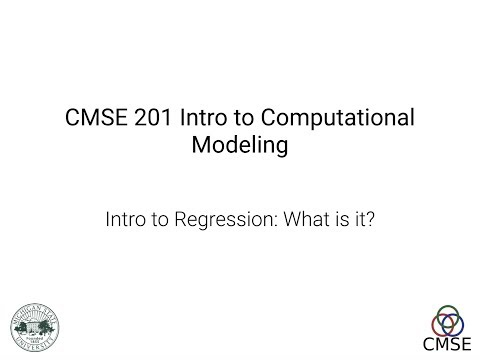

In [1]:
from IPython.display import YouTubeVideo  
YouTubeVideo("DFNzRRPjWWk",width=640,height=360)

Here are the three main types of regression that we will explore in this class.  This is to identify the relationship of how the vardiable $y$ depends on the variable $x$.  This relationship is a type of a model describing how $y$ changes with $x$.  
<img src="https://raw.githubusercontent.com/msu-cmse-courses/cmse201-S21-student/master/assets/img/regression201.png" width=400px>

----
## Part 2: Doing Regression "By Hand"

Time to practice using regression to fit a function to some data. The next video covers an example of fitting a simple linear regression model "by hand" - calculating the slope and intercept values given some data. 


#### Watch this video
If the YouTube video doesn't work, try this [MediaSpace link](https://mediaspace.msu.edu/media/RegressionA+Methods+and+Examples/1_gtg70ib1).

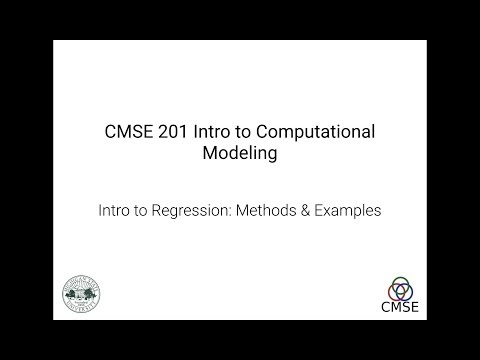

In [2]:
from IPython.display import YouTubeVideo  
YouTubeVideo("1YUHyBTztOc",width=640,height=360)

____
Using what was covered in the previous video, follow along with the code below where we will use ordinary least squares (OLS) solutions to fitting a simple linear regression model. 

First we can make our necessary imports and then generate some data to work with!

In [5]:
# Import our necessary packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

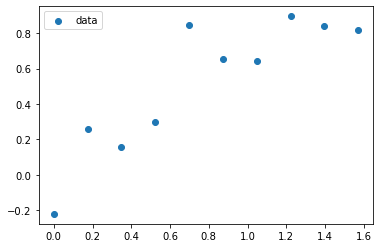

In [6]:
# create some x data points from 0 to π/2
x = np.linspace(0,np.pi/2,10)

# create some y data using sin(x) -- we add some "randomness" to the data using np.random.randn(10)
y = np.sin(x) + 0.1*np.random.randn(10)

# plot our data
plt.scatter(x, y, label = "data")
plt.legend()
plt.show()

Look at the plot above. Notice that the relationship between $y$ and $x$ is roughly linear. This means we can use the ordinary least squares (OLS) approach to fit a line to the data. Below is a function that performs OLS.

The equations for linear regression are at in the video, but are repeated here as a reference:

$$\bar{x} = \frac{1}{N}\sum_i x_i$$

$$\bar{y} = \frac{1}{N}\sum_i y_i$$

$$ m = \frac{\sum_i x_i y_i - N\bar{x}\bar{y}}{\sum_i x_i^2 - N\bar{x}^2}$$

$$ b = \bar{y} - m\bar{x}$$

Recall that:
* $x_i$ are the $x$ coordinates, and there are $N$ of them
* $y_i$ are the $y$ values of the data, and there are also $N$ of them
* the sums, $\sum_i$, means that you sum up all of the values that follow; for example, $\sum_ix_i = x_0 + x_1 + \cdots x_{N-1}$

&#9989;&nbsp; **In the function below, comment the code where specified and fill in the equation for calculating $b$, the intercept!**

In [8]:
# This function is used to calculate ordinary least squares regression parameters given some data

def my_ols_parameters(x, y):
    
    # average of x data
    mean_x = np.mean(x)
    
    # average of y data
    mean_y = np.mean(y)
    
    # number of data points we have -- len(y) would work too
    N = len(x)
    
    # the sum of all the x multiplied by all the y
    xy_product_sum = np.sum(x*y)
    
    # the sum of all the x squared
    xx_product_sum = np.sum(x**2)
    
    
    # what is this line doing?
    # performing a linear regression to find the the coeff. of x/slope of the best fit line 
    m = (xy_product_sum - N * mean_x * mean_y)/(xx_product_sum - N*mean_x**2)

    # UNCOMMENT AND FILL IN THIS CODE
    # calculate the intercept using the equation above
    b = mean_y - (m * mean_x)
    
    # what does this function return?
    # returns the OLS estimates for slope (m) and intercept (b) 
    return m, b

The function provided below (no changes to this function are needed) takes in our $x$ data and our estimated slope and intercept values to predict expected $y$ values. We will use this function below when we plot our fitted linear regression model!

In [7]:
# THIS FUNCTION IS PROVIDED, NO CHANGES NECESSARY
# This function uses a regression equation to predict y given x
# It takes in b (the intercept), m (the coefficient), and
# x (the independent data)

def my_ols_regression(x, m, b):
    
    expected_y = m*x + b
    
    return expected_y

In the cell below, we call our finished `my_ols_parameters` function to calculate our parameters and then feed these into our `my_ols_regression` function to calculate our expected $y$ values.

&#9989;&nbsp; Comment the code below where specified!

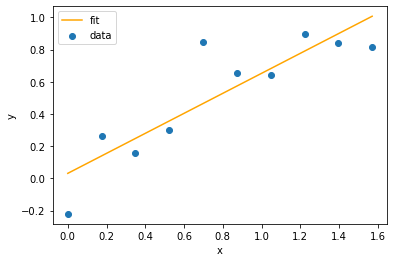

In [9]:
# parameters of the linear regression model that attempts to describe the relationship between y and x
# m_expected - slope parameter of regression line/line of best fit of the data
# b_expected - intercept parameter of regression line
m_expected, b_expected = my_ols_parameters(x, y)

# m is the estimated effect of x on y that best fits the averages of the data; 
# b is the estimated value of y when x = 0
# x data/observations of x
# expected_y - predicted value of y given observation x on the line of best fit
expected_y = my_ols_regression(x, m_expected, b_expected)

# plot our data against our fitted linear regression
plt.scatter(x, y, label = "data")
plt.plot(x, expected_y, color = "orange", label = "fit")

plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

&#9989;&nbsp; Print out your calculated slope and intercept below. What do these values mean in terms of $x$ and $y$? That is, what does the slope tell you about how $y$ changes when $x$ changes? What information does the intercept provide?

In [10]:
# Put your code here
print('slope:', m_expected)
print('intercept:', b_expected)

slope: 0.6209871573206579
intercept: 0.03129928146940042


<font size=+3>&#9998;</font>
* Predicted value of y when x = 0 is 0.03129928146940042.
* When x increases by 1 unit, the predicted/estimated change in y is + 0.6209871573206579.

----
## Part 3: Regression using `np.polyfit` and `np.poly1d`

Now that we have practiced regression by hand, we can take a look at how Python makes fitting a regression model to some data a lot easier! NumPy provides us with a couple of functions that can take data and fit a linear regression model to it (links are provided to the documentation):

* [`np.polyfit`](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.polyfit.html])
* [`np.poly1d`](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.poly1d.html)

Fitting regression models with your own written functions can be a pain when there is a lot of data or you have a complicated function. NumPy makes this process very fast and efficient. Watch the video below for a quick tutorial! Note the similarities between `np.polyfit`/`np.poly1d` and our `my_ols_parameters`/`my_ols_regression` functions above.

#### Watch this video
If the YouTube video doesn't work, try this [MediaSpace link](https://mediaspace.msu.edu/media/Regression+in+PythonA+NumPy+and+polyfit/1_l2gzdkhq).

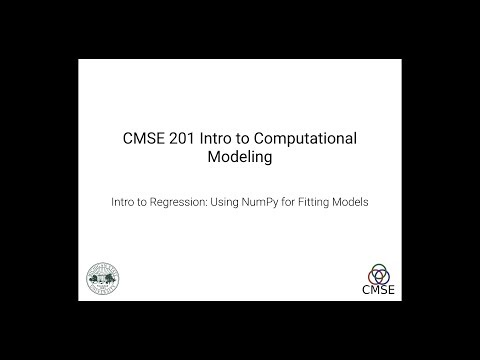

In [3]:
from IPython.display import YouTubeVideo  
YouTubeVideo("WUIMxqrPcDE",width=640,height=360)

____
Let's work through a couple of examples of `np.polyfit` and `np.poly1d` using the $x$ and $y$ data from the above exercise. First, let's quickly do a first-order linear regression like we did above!

&#9989;&nbsp; How do these calculated parameter values compare to when we calculated them "by hand" above?

In [11]:
parameters = np.polyfit(x, y, 1) #degree = 1 / linear

print(parameters)

[0.62098716 0.03129928]


<font size=+3>&#9998;</font> *Same just less decimal places*

&#9989;&nbsp; Instead of doing a simple first-order (linear) regression, let's use `np.polyfit` to fit a simple second-order (quadratic) regression to our $x$ and $y$ data. **You will need to fill in the some of the code below in order to get the plot to work.** (you may need to refer back to the last video if you can't figure this out)

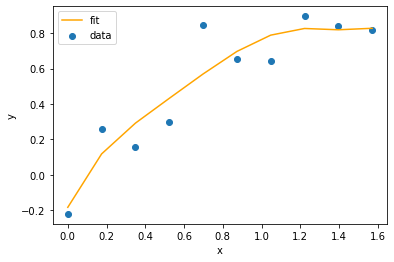

In [25]:
# use np.polyfit to get the parameters for our polynomial regression
poly_parameters = np.polyfit(x, y, 5)

# uncomment this code and pass in the parameters array to np.poly1d to create a regression function
my_poly_function = np.poly1d(poly_parameters)

# initialize our predicted y values from the my_poly_function created using np.poly1d
expected_y_poly = my_poly_function(x)

# plot our data against our fitted function
plt.scatter(x, y, label = "data")
plt.plot(x, expected_y_poly, color = "orange", label = "fit")

plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

&#9989;&nbsp; Once you have things working in the code above, try changing the order of the polynomial fit in your call to `np.polyfit()`. At what value for the order of the polynomial do you feel like you might be overfitting the data? What makes you choose that particular value?

<font size=+3>&#9998;</font>
By 5th degree order, the trend when x > 1.2 is much different than when x <= 1.2 indicating that it is fitted too specifically to the data to be effective at forecasting results of other observations.

---
## Assignment wrap-up

Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**

In [4]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://cmse.msu.edu/cmse201-pc-survey" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

### Congratulations, you're done!

Submit this assignment by uploading it to the course Desire2Learn web page.  Go to the "Pre-class assignments" folder, find the appropriate submission link, and upload it there.

See you in class!

&#169; Copyright 2018,  Michigan State University Board of Trustees